# Insurance Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

öncelikle numpy ,seaborn ve pandas kütüphanelerini tanımlayarak başlıyoruz.

indirmiş olduğumuz veri setini çağırıyoruz ve satır ve sütun sayılarına "shape" fonksiyonu sayesinde erişiyoruz.

In [2]:
df_insurance = pd.read_csv("insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_insurance.shape

(1338, 7)

"columns" fonksiyonu yardımıyla sütunlarına eriştik.

In [4]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

"info" ile de dfimiz hakkında bilgilere eriştik. Tüm değişkenlerin tiplerini, boş olmayan değer sayıları tespit edildi.

In [5]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


__Bilgilendirme amacıyla değişkenlerin neyi kastettiği aşağıda sırasıyla açıklanmıştır.__

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## 1- Eksik Veriler

Oluşturduğumuz data frame'de eksik değer olup olmadığını tespit etmek için "isnull" ve "sum" fonksiyonlarını kullandık. Görüldüğü üzere data framemizde eksik değer bulunmamakta.

In [6]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
import missingno as msno

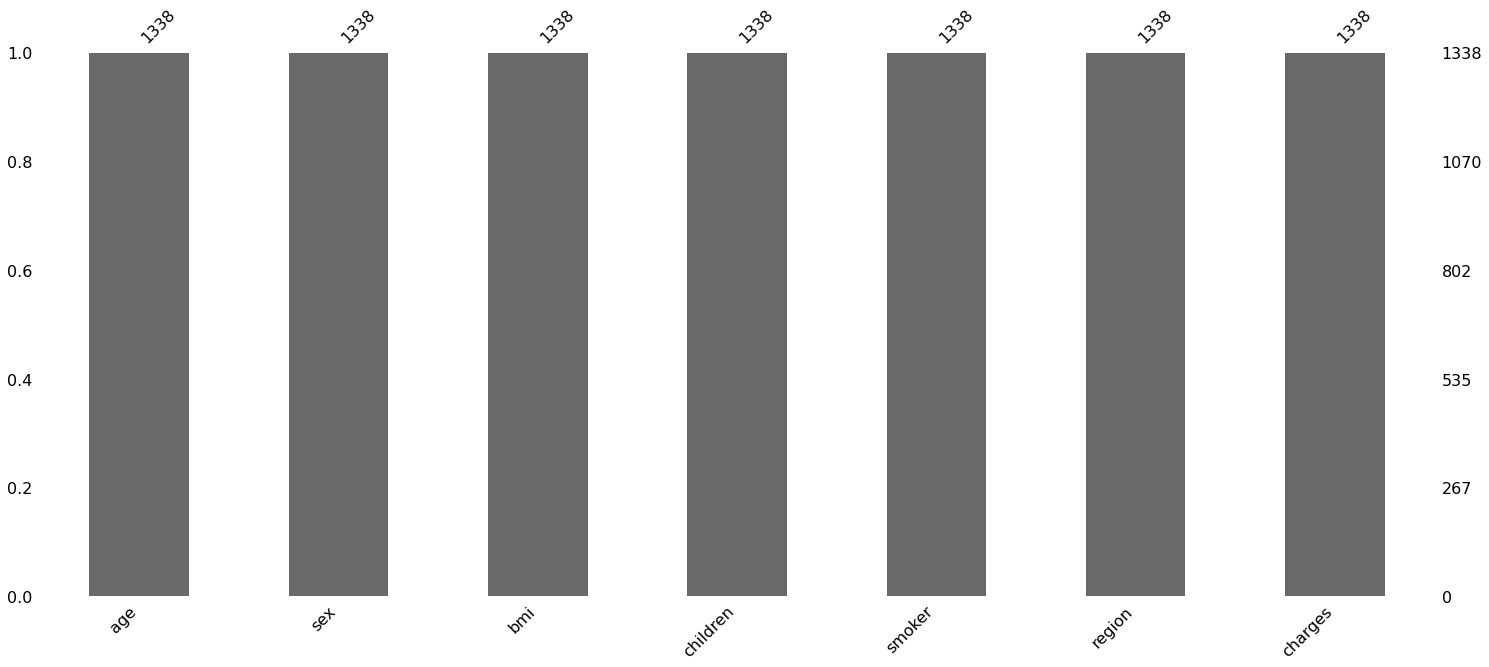

In [8]:
msno.bar(df_insurance);

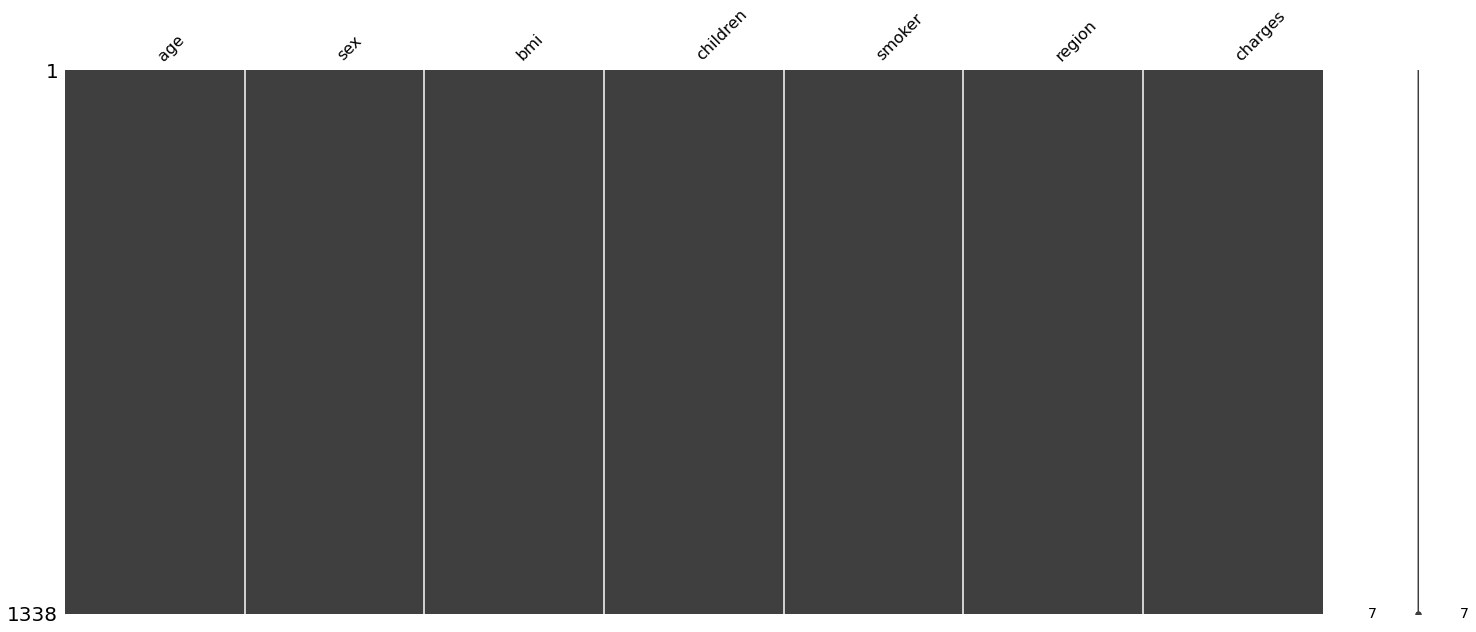

In [9]:
msno.matrix(df_insurance);

Veri setimizde eksik değer olsaydı bu grafiklerdeki boşluklar sayesinde yorum yapabilirdik.

## 2- Veri Görselleştirme

In [10]:
import matplotlib.pyplot as plt 

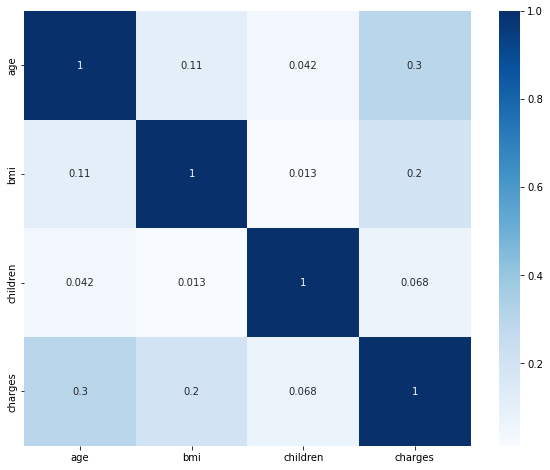

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(df_insurance.corr(), cmap = "Blues", annot = True );

Bu bir korelasyon grafiğidir. Korelasyon:iki ya da daha fazla dağılımların birbiri arasındaki ilişkisidir. Bağımsız olması için olabildiğince oranın 0'a yakın olması gerekir. Burada dikkatimizi çeken oranlar 0.3 olan "charges" ve "age" değişkeni arasındaki oran ve 0.2 olan "charges" ve "bmi" değişkeni arasındaki oran. Bunların birbirine diğer değişkenlerden çok daha bağlı olduğu gözlemleniyor.

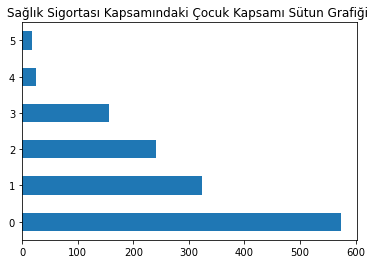

In [12]:
(df_insurance["children"]
.value_counts()
.plot.barh()
.set_title("Sağlık Sigortası Kapsamındaki Çocuk Kapsamı Sütun Grafiği ") );

In [13]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [14]:
lbe.fit_transform(df_insurance["sex"])

array([0, 1, 1, ..., 0, 0, 0])

In [15]:
df_insurance["sex"] = lbe.fit_transform(df_insurance["sex"])

In [16]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


Görselleştirmede kolaylık sağlaması için "sex" değişkenini  ve 1'e dönüştürdük.

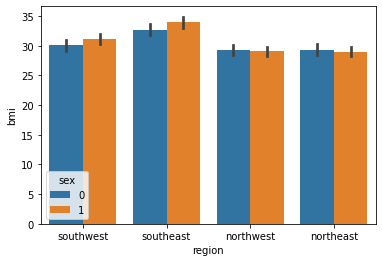

In [17]:
sns.barplot(x="region" , y="bmi" , hue="sex", data=df_insurance); 

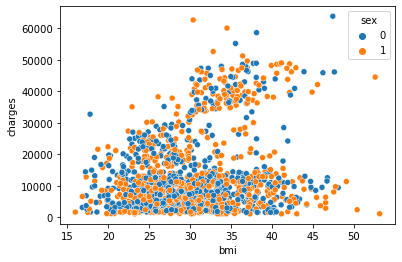

In [18]:
sns.scatterplot(x = "bmi", y = "charges", hue = "sex" ,data = df_insurance);

"age" , "charges" ve "sex" değişkenleriyle bir grafik oluşturduk. Yukarıdaki korelasyon grafiğinde de bahsedildiği üzere "age" ve "charges" arasında bir ilişki bulunmakta. Grafiği incelediğimizde genellikle age değişkeni arttığı zaman charges değişkeni de artmakta. 

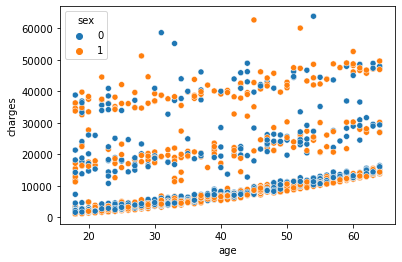

In [19]:
sns.scatterplot(x = "age", y = "charges", hue = "sex" ,data = df_insurance);

Oluşturduğumuz "count" fonksiyonu sayesinde istenilen her bir sütunun değerlerini, değerlerinin sütun grafiğini ve daire grafiğini göstermesini amaçladık.

In [20]:
def count(i):
    print(df_insurance[i].value_counts())
    
    df_insurance[i].value_counts().plot(kind = 'bar')
    plt.show()
    df_insurance[i].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

Burada  0 female , 1 ise male'i gösteriyor.

Erkek kadın oranının neredeyse yakın olduğunu ve 0.5 gibi bir oran ile farklılaştığını görüyoruz.

Male: 676 // Female: 662

1    676
0    662
Name: sex, dtype: int64


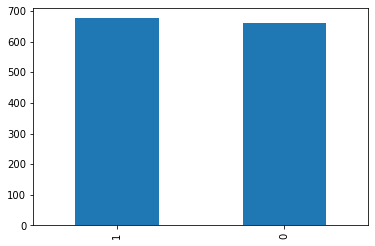

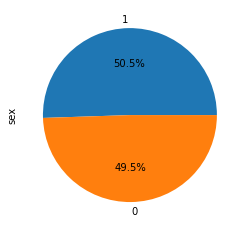

In [21]:
count("sex");

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


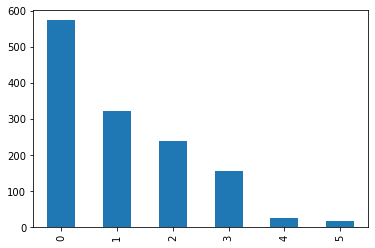

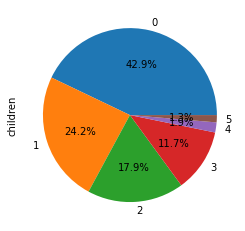

In [22]:
count("children");

no     1064
yes     274
Name: smoker, dtype: int64


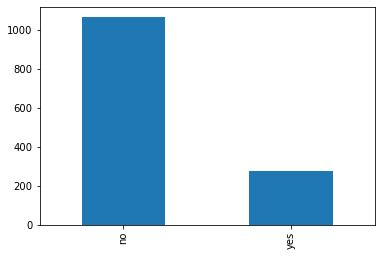

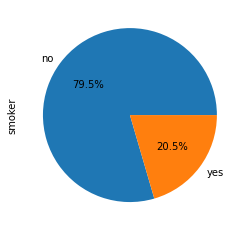

In [23]:
count("smoker");

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


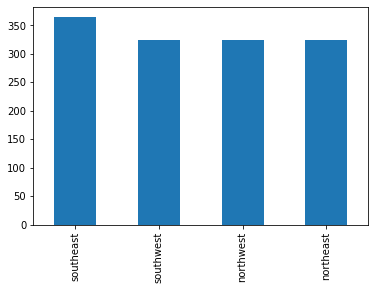

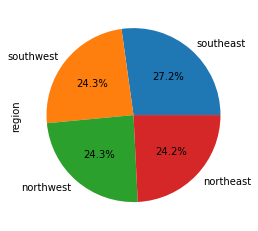

In [24]:
count("region");

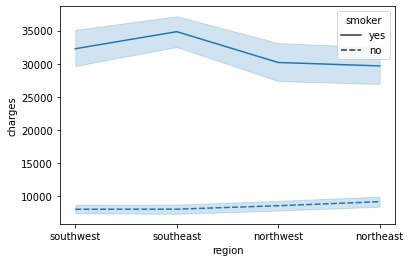

In [25]:
sns.lineplot(x="region" ,
             y="charges" , 
             style="smoker", data=df_insurance);

## 3- Aykırı Değerler

Veri setimizde değerleri kutu grafiği ile görselleştirmek için seaborn kütüphanesi altındaki boxplot(kutu) grafiğini kullandık.

Tek tek yorum yapabilmek adına bu grafikler için özel bir fonksiyon yazmadık. 

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


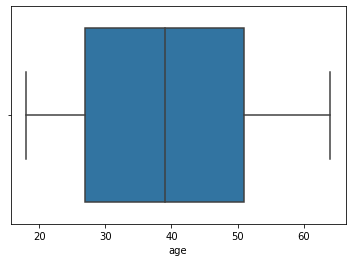

In [26]:
sns.boxplot(df_insurance["age"]);

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


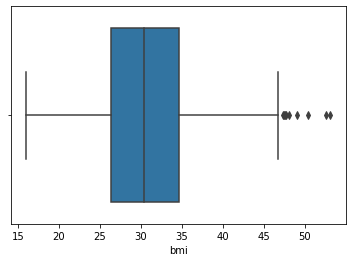

In [27]:
sns.boxplot(df_insurance["bmi"]);

"bmi" grafiğini incelediğimizde Q1,Q2,Q3 değerlerinin sırasıyla 25-30 arası, 30 ve 30-35 arasında hesaplandığını; alt sınır değerinin olmadığını ve üst sınır değerinin de 45'den sonra olduğunu görüyoruz.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


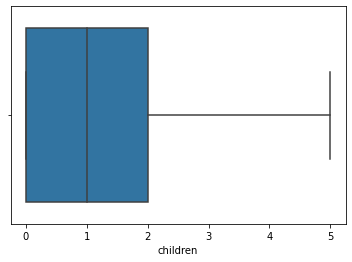

In [28]:
sns.boxplot(df_insurance["children"]);

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


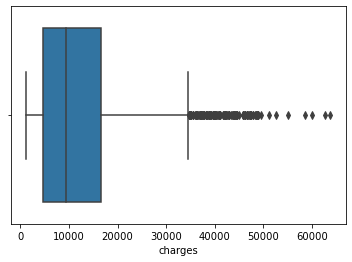

In [29]:
sns.boxplot(df_insurance["charges"]);

"charges" grafiğini incelediğimizde medyanın 10000'e yakın olarak hesaplandığını; alt sınır değerinin olmadığını ve üst sınır değerinin de 35000'den sonra yoğunlaşarak 60000 civarına çıktığını görüyoruz.

### IQR Yöntemi

In [30]:
Q1 = df_insurance.quantile(0.25)
Q3 = df_insurance.quantile(0.75)
IQR=Q3-Q1

In [31]:
print("Q1:\n",Q1)
print("Q3:\n",Q3)
print("IQR\n",IQR)

Q1:
 age           27.00000
sex            0.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64
Q3:
 age            51.000000
sex             1.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64
IQR
 age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [32]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [33]:
print("Alt sınır değerleri:\n" , alt_sinir)
print("Üst sınır değerleri:\n" , ust_sinir)

Alt sınır değerleri:
 age            -9.000000
sex            -1.500000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64
Üst sınır değerleri:
 age            87.000000
sex             2.500000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64


"bmi" ve "charges" değişkenlerindeki aykırı değerleri aşağıda listeledik.

In [34]:
aykiri_bmi = df_insurance[(df_insurance['bmi'] < alt_sinir['bmi']) |
   (df_insurance['bmi'] > ust_sinir['bmi'])]
aykiri_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,no,southeast,11381.32540
286,46,0,48.07,2,no,northeast,9432.92530
401,47,1,47.52,1,no,southeast,8083.91980
543,54,0,47.41,0,yes,southeast,63770.42801
847,23,1,50.38,1,no,southeast,2438.05520
860,37,0,47.60,2,yes,southwest,46113.51100
1047,22,1,52.58,1,yes,southeast,44501.39820
1088,52,1,47.74,1,no,southeast,9748.91060
1317,18,1,53.13,0,no,southeast,1163.46270


In [35]:
aykiri_charges = df_insurance[(df_insurance['charges'] < alt_sinir['charges']) |
   (df_insurance['charges'] > ust_sinir['charges'])]
aykiri_charges

,age,sex,bmi,children,smoker,region,charges
14,27,1,42.130,0,yes,southeast,39611.75770
19,30,1,35.300,0,yes,southwest,36837.46700
23,34,0,31.920,1,yes,northeast,37701.87680
29,31,1,36.300,2,yes,southwest,38711.00000
30,22,1,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,1,30.360,0,yes,southeast,62592.87309
1301,62,1,30.875,3,yes,northwest,46718.16325
1303,43,1,27.800,0,yes,southwest,37829.72420
1313,19,0,34.700,2,yes,southwest,36397.57600


In [36]:
(df_insurance["charges"]).mean()

13270.422265141257